In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('spotify.csv')
df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


In [4]:
df.shape

(100, 16)

In [5]:
# columns and type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
id                  100 non-null object
name                100 non-null object
artists             100 non-null object
danceability        100 non-null float64
energy              100 non-null float64
key                 100 non-null float64
loudness            100 non-null float64
mode                100 non-null float64
speechiness         100 non-null float64
acousticness        100 non-null float64
instrumentalness    100 non-null float64
liveness            100 non-null float64
valence             100 non-null float64
tempo               100 non-null float64
duration_ms         100 non-null float64
time_signature      100 non-null float64
dtypes: float64(13), object(3)
memory usage: 12.6+ KB


Out fo 16 columns: 13 are numeric float and 3 non numeric.

In [7]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00
mean,0.71646,0.659060,5.330000,-5.677640,0.590000,0.115569,0.195701,0.001584,0.158302,0.484443,119.904180,205206.780000,3.98
std,0.13107,0.145067,3.676447,1.777577,0.494311,0.104527,0.220946,0.013449,0.111662,0.206145,28.795984,40007.893404,0.20
min,0.25800,0.296000,0.000000,-10.109000,0.000000,0.023200,0.000282,0.000000,0.021500,0.079600,64.934000,95467.000000,3.00
25%,0.63550,0.562000,1.750000,-6.650500,0.000000,0.045350,0.040225,0.000000,0.094675,0.341000,95.730750,184680.000000,4.00
50%,0.73300,0.678000,5.000000,-5.566500,1.000000,0.074950,0.109000,0.000000,0.118500,0.470500,120.116000,205047.500000,4.00
75%,0.79825,0.772250,8.250000,-4.363750,1.000000,0.137000,0.247750,0.000031,0.170750,0.641500,140.022750,221493.250000,4.00
max,0.96400,0.909000,11.000000,-2.384000,1.000000,0.530000,0.934000,0.134000,0.636000,0.931000,198.075000,417920.000000,5.00


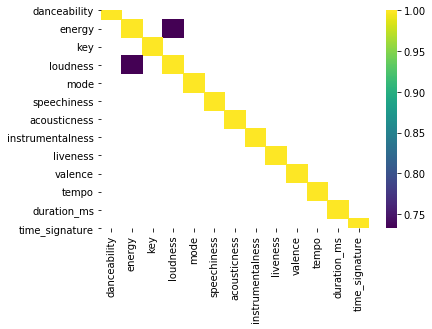

In [26]:
corr =df.corr().abs()
corr_m= corr[corr>0.55]
sns.heatmap(corr_m, cmap='viridis')

In [115]:
#selecting variables with numerical variables
col= df.select_dtypes(include=np.number)
col.columns


Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'cluster_1'],
      dtype='object')

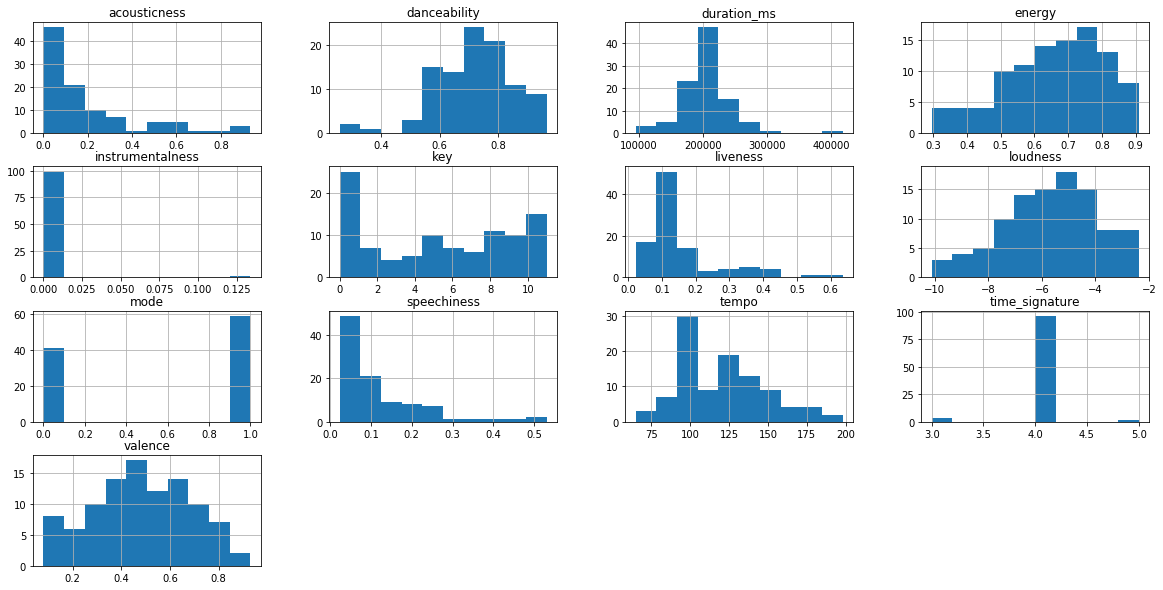

In [118]:
df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature']].hist(figsize=(20,10))
plt.show()



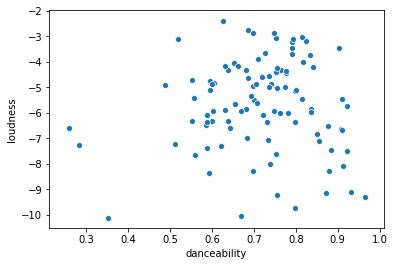

In [113]:
sns.scatterplot(x=df['danceability'], y=df['loudness'])
plt.show()


In [40]:
df[['danceability','loudness']].describe()

,danceability,loudness
count,100.00000,100.000000
mean,0.71646,-5.677640
std,0.13107,1.777577
min,0.25800,-10.109000
25%,0.63550,-6.650500
50%,0.73300,-5.566500
75%,0.79825,-4.363750
max,0.96400,-2.384000


In [83]:
data_scale = scale(df[['danceability','loudness']])
# data_scale

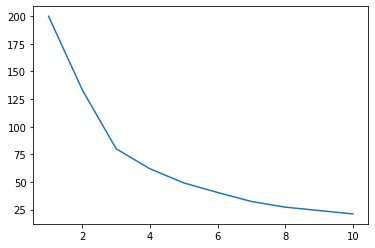

In [84]:
#determining num of cluster with elbow test
num_clusters =list(range(1,11))
Kmean_list = [KMeans(n_clusters=i) for i in num_clusters]
scores = [Kmean_list[i-1].fit(data_scale).inertia_ for i in num_clusters]
sns.lineplot(num_clusters,scores)


elbow = 3, number of clusters = 3

In [89]:
model = KMeans(n_clusters=3, random_state=123)
model.fit(data_scaled)
df['cluster_1']=model.labels_
df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_1
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0,1
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0,0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0,2
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0,1
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0,1


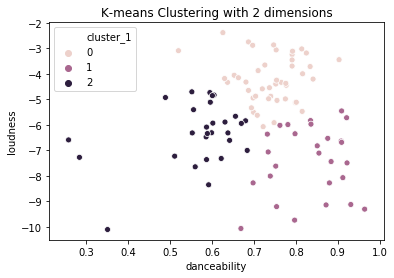

In [93]:
x=df['danceability']
y=df['loudness']
sns.scatterplot(x, y, hue=df['cluster_1'])
plt.title('K-means Clustering with 2 dimensions')
plt.show()


### danceability and loudness before and after clustered

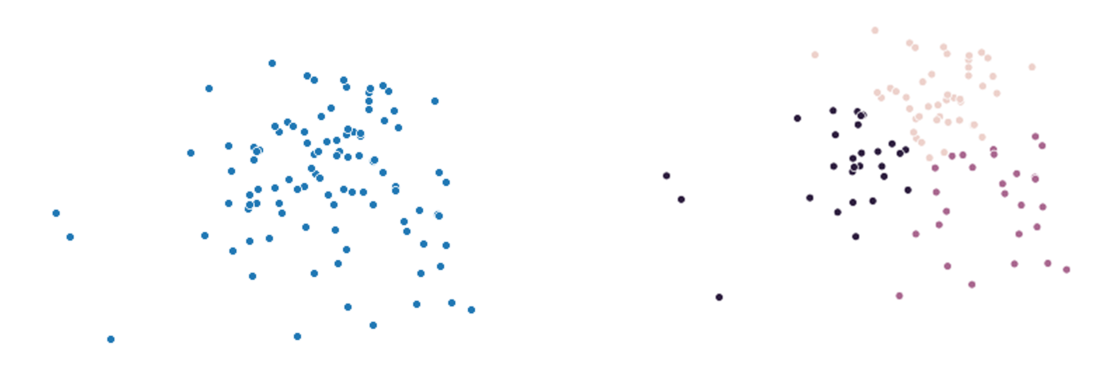


In [100]:
df[['name','artists']][df['cluster_1']==0]

,name,artists
1,SAD!,XXXTENTACION
6,I Like It,Cardi B
7,One Kiss (with Dua Lipa),Calvin Harris
9,FRIENDS,Marshmello
10,Havana,Camila Cabello
14,The Middle,Zedd
15,All The Stars (with SZA),Kendrick Lamar
16,no tears left to cry,Ariana Grande
20,"These Days (feat. Jess Glynne, Macklemore & Da...",Rudimental
21,Te Bot? - Remix,Nio Garcia


In [102]:
df[['name','artists']][df['cluster_1']==1]

,name,artists
0,God's Plan,Drake
3,Psycho (feat. Ty Dolla $ign),Post Malone
4,In My Feelings,Drake
8,IDGAF,Dua Lipa
13,Girls Like You (feat. Cardi B),Maroon 5
18,Moonlight,XXXTENTACION
19,Look Alive (feat. Drake),BlocBoy JB
24,New Rules,Dua Lipa
28,Jocelyn Flores,XXXTENTACION
30,Taste (feat. Offset),Tyga


In [104]:
df[['name','artists']][df['cluster_1']==2]

,name,artists
2,rockstar (feat. 21 Savage),Post Malone
5,Better Now,Post Malone
11,Lucid Dreams,Juice WRLD
12,Nice For What,Drake
17,X,Nicky Jam
23,Youngblood,5 Seconds of Summer
27,Meant to Be (feat. Florida Georgia Line),Bebe Rexha
29,Perfect,Ed Sheeran
32,I Fall Apart,Post Malone
33,Nevermind,Dennis Lloyd


In [106]:
# First, transform the dataframe so that it is "tidy"
melted_df = pd.melt(df, id_vars = ['cluster_1','id', 'name', 'artists'])

In [111]:
melted_df.set_index(['id', 'cluster_1']).head()

,,name,artists,variable,value
id,cluster_1,,,,
6DCZcSspjsKoFjzjrWoCd,1,God's Plan,Drake,danceability,0.754
3ee8Jmje8o58CHK66QrVC,0,SAD!,XXXTENTACION,danceability,0.740
0e7ipj03S05BNilyu5bRz,2,rockstar (feat. 21 Savage),Post Malone,danceability,0.587
3swc6WTsr7rl9DqQKQA55,1,Psycho (feat. Ty Dolla $ign),Post Malone,danceability,0.739
2G7V7zsVDxg1yRsu7Ew9R,1,In My Feelings,Drake,danceability,0.835


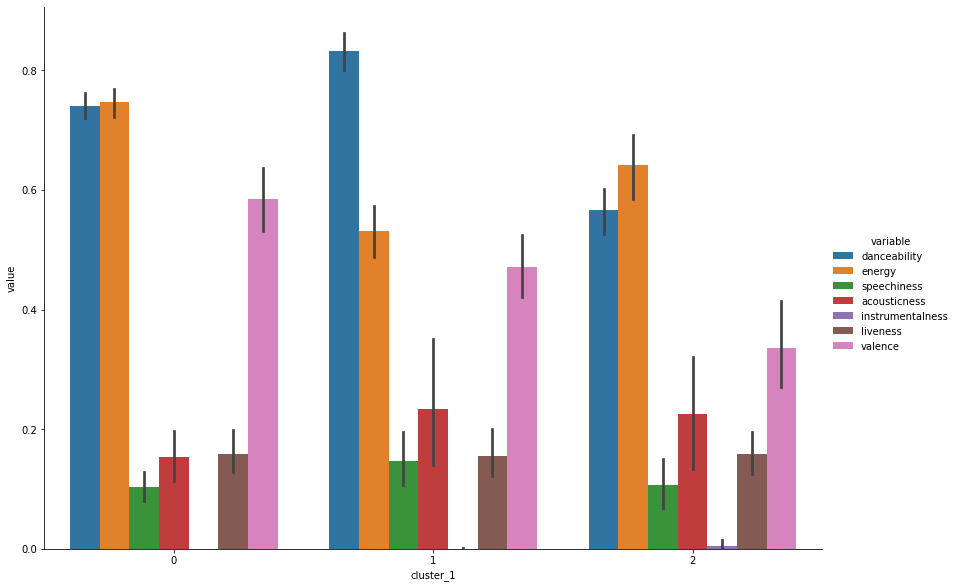

In [112]:
g = sns.catplot(x="cluster_1", 
                y="value", 
                hue="variable", 
                data=melted_df[(melted_df['variable'] == 'danceability') |
                              (melted_df['variable'] == 'energy') |
                              (melted_df['variable'] == 'speechiness') |
                              (melted_df['variable'] == 'acousticness') |
                              (melted_df['variable'] == 'instrumentalness') |
                              (melted_df['variable'] == 'liveness') |
                              (melted_df['variable'] == 'valence') ],
                kind="bar", height=8.27, aspect=11.7/8.27)

Lets repeat it now for valence and loudness            

In [121]:
df[['valence', 'loudness']]

,valence,loudness
0,0.3570,-9.211
1,0.4730,-4.880
2,0.1400,-6.090
3,0.4390,-8.011
4,0.3500,-5.833
...,...,...
95,0.2840,-7.005
96,0.3300,-6.318
97,0.6390,-4.706
98,0.0967,-6.593


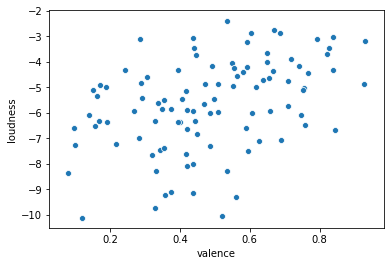

In [139]:
sns.scatterplot( x=df['valence'], y=df['loudness'])

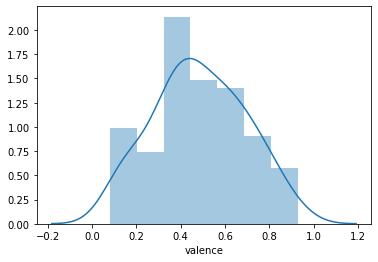

In [122]:
sns.distplot(df.valence)

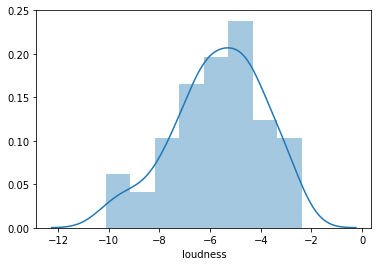

In [124]:
sns.distplot(df.loudness)

In [129]:
#scale data
data_scaled2 = scale(df[['valence', 'loudness']])


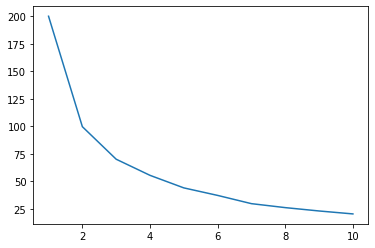

In [132]:
#scores changes because scaled data name is different data_scaled2, the rest is the same function already used
scores = [Kmean_list[i-1].fit(data_scaled2).inertia_ for i in num_clusters]
sns.lineplot (num_clusters, scores)
               
                      


It seems like two elbows at 2 and at 3, to play safe we will chose 3 again

In [138]:
#create and fit the model
model2 = KMeans(n_clusters = 3, random_state= 123)
model2.fit(data_scaled2)
df['cluster_2']= model2.labels_
df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_1,cluster_2
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0,1,1
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0,0,2
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0,2,2
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0,1,1
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0,1,2


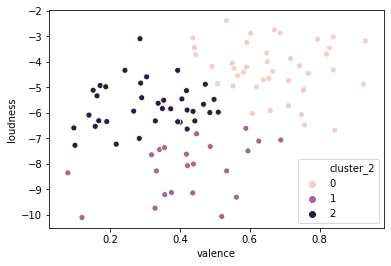

In [141]:
sns.scatterplot( x=df['valence'], y=df['loudness'], hue=df['cluster_2'])

In [144]:
melted_df = pd.melt(df, id_vars = ['cluster_2','id', 'name', 'artists'])

In [145]:
melted_df.set_index(['id', 'cluster_2']).head()

,,name,artists,variable,value
id,cluster_2,,,,
6DCZcSspjsKoFjzjrWoCd,1,God's Plan,Drake,danceability,0.754
3ee8Jmje8o58CHK66QrVC,2,SAD!,XXXTENTACION,danceability,0.740
0e7ipj03S05BNilyu5bRz,2,rockstar (feat. 21 Savage),Post Malone,danceability,0.587
3swc6WTsr7rl9DqQKQA55,1,Psycho (feat. Ty Dolla $ign),Post Malone,danceability,0.739
2G7V7zsVDxg1yRsu7Ew9R,2,In My Feelings,Drake,danceability,0.835


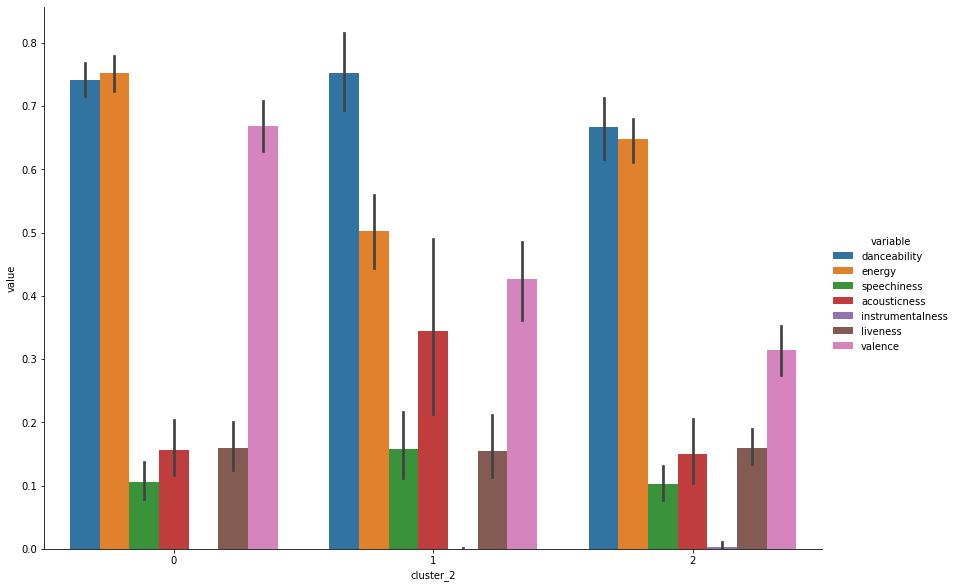

In [146]:
g = sns.catplot(x="cluster_2", 
                y="value", 
                hue="variable", 
                data=melted_df[(melted_df['variable'] == 'danceability') |
                              (melted_df['variable'] == 'energy') |
                              (melted_df['variable'] == 'speechiness') |
                              (melted_df['variable'] == 'acousticness') |
                              (melted_df['variable'] == 'instrumentalness') |
                              (melted_df['variable'] == 'liveness') |
                              (melted_df['variable'] == 'valence') ],
                kind="bar", height=8.27, aspect=11.7/8.27)